#LINEAR REGRESSION

###*  In machine learning, there are two different types of supervised learning methods: classification and regression.

###* In general, regression is a statistical method that estimates relationships between variables. Classification also attempts to find relationships between variables, with the main difference between classification and regression being the output of the model.

### * In a regression task, the output variable is numerical or continuous in nature, while for classification tasks the output variable is categorical or discrete in nature. If a variable is categorical it means that there is a finite/discrete number of groups or categories the variable can fit into.

##                            But what is Linear Regression ??

Linear Regression is a method used to define a relationship between a dependent variable (Y) and independent variable (X). Which is simply written as :

![alt text](https://drive.google.com/uc?id=1scs_K6Cn1oH5RsE8KMQVrNTDlPGyNJXA)

###Where y is the dependent variable, m is the scale factor or coefficient, b being the bias coefficient and X being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between X and Y which estimates the relationship between X and Y.


##Ordinary Least Square Method

###Let’s say we have few inputs and outputs. And we plot these scatter points in 2D space, we will get something like the following image.

![alt text](https://drive.google.com/uc?id=1sVyfjM4Wa9B3l3pNNLjEsd-DqEDluGZG)

### We want to minimize the error of our model. A good model will always have least error. We can find this line by reducing the error. The error of each point is the distance between line and that point. This is illustrated as follows.



![alt text](https://drive.google.com/uc?id=1zJlaRuKIzuFnbax1v9goe0xfYh0UqZQy)

The total error of this model is the sum of all errors of each point. ie.

![alt text](https://drive.google.com/uc?id=1D7LCjXCIbstyJcUMTVmOZr6xCXPKgk2q)

mm - Total number of points

You might have noticed that we are squaring each of the distances. This is because, some points will be above the line and some points will be below the line. We can minimize the error in the model by minimizing DD. And after the mathematics of minimizing DD, we will get;

![alt text](https://drive.google.com/uc?id=1vDWE5UdTrpz-rfMeGhVDjoTgP64MKhqM)
ˉ
 
In these equations \bar{x} 
x
ˉ
  is the mean value of input variable X and \bar{y} 
y
ˉ
​	  is the mean value of output variable Y.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('/content/drive/My Drive/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [0]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [0]:
#Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


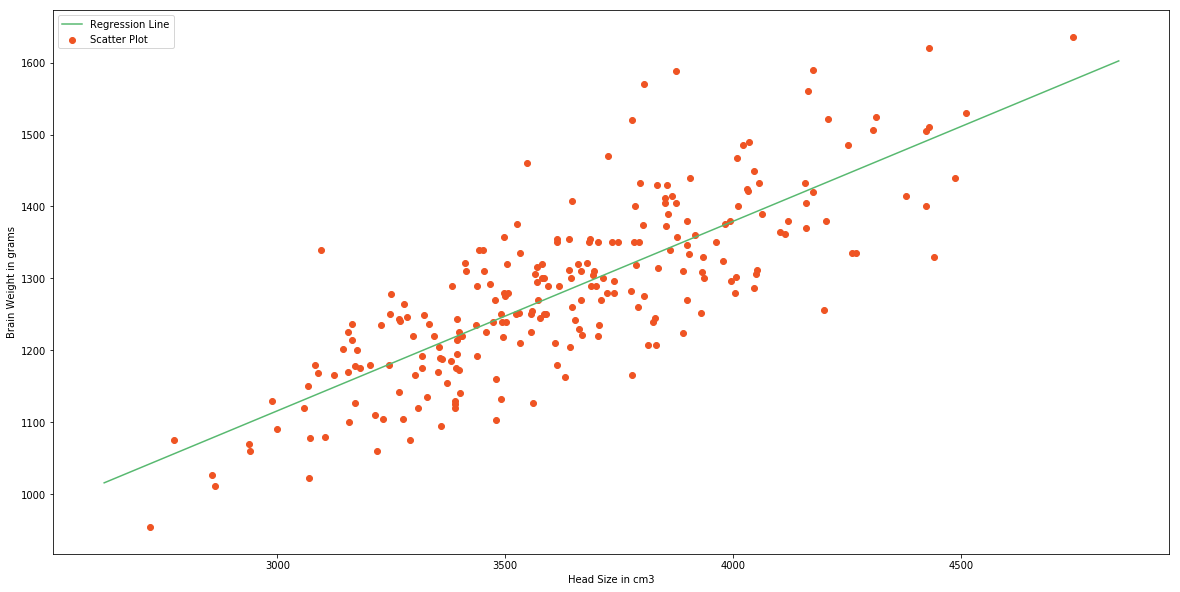

In [0]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use Root Mean Squared Error and Coefficient of Determination(R^2R 
2
  Score).

![alt text](https://drive.google.com/uc?id=1B9AuMHlqUBCT5539SyFLhhUUZqnfGTfN)

In [0]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

72.1206213783709


Now we will find R^2R 
2
  score. R^2R 
2
  is defined as follows,:
  
  ![alt text](https://drive.google.com/uc?id=16FWDSQ33qFHmYPcI4yJXoy8-y0aZhsIb)

SS 
t
​	  is the total sum of squares and SS_rSS 
r
​	  is the total sum of squares of residuals.

R^2R 
2
  Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find R^2R 
2
  Score.

ss_t = 0

ss_r = 0

for i in range(m):

    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
    
r2 = 1 - (ss_r/ss_t)

print(r2)

## The scikit-learn approach

scikit-learn is simple machine learning library in Python. Building Machine Learning models are very easy using scikit-learn. Let’s see how we can build this Simple Linear Regression Model using scikit-learn.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X, Y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957


## Multiple Linear Regression
Multiple Linear Regression is a type of Linear Regression when the input has multiple features(variables).

## Model Representation
Similar to Simple Linear Regression, we have input variable(X) and output variable(Y). But the input variable has nn features. Therefore, we can represent this linear model as follows;



![alt text](https://drive.google.com/uc?id=1wsFTHetA3-o-EStUN2dhapaOqC_U9yoi)

![alt text](https://drive.google.com/uc?id=1gKWZ-oKj9OYWjjYsk-b7zz9-dWX_HUNn)

![alt text](https://drive.google.com/uc?id=1PO2Q7Fq4RYzOTlTvs-OpYHakbZd7rSG4)

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('/content/drive/My Drive/student.csv')
print(data.shape)
data.head()

(1000, 3)


,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


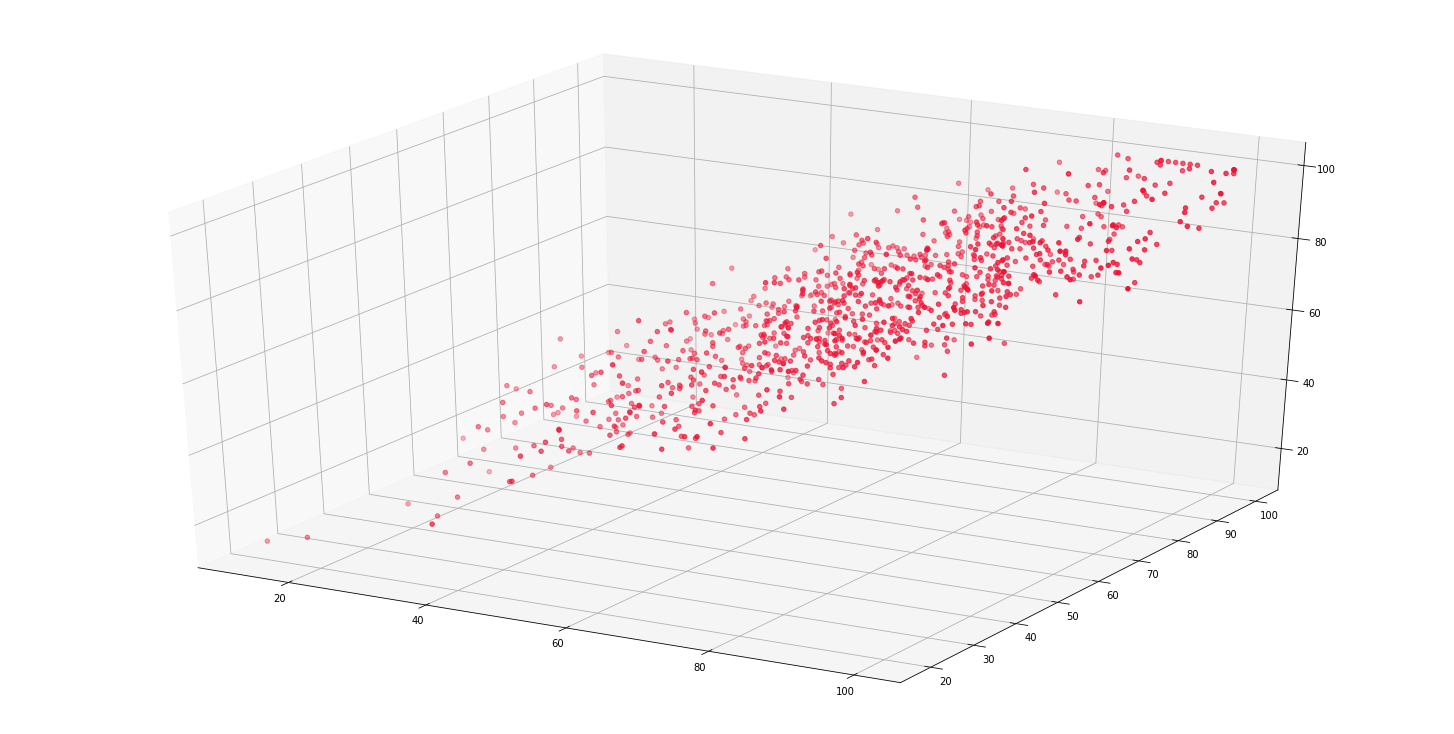

In [0]:
math = data['Math'].values
read = data['Reading'].values
write = data['Writing'].values

# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math, read, write, color='#ef1234')
plt.show()

In [0]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
# Initial Coefficients
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [0]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [0]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

2470.11


In [0]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [0]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[-0.47889172  0.09137252  0.90144884]
10.475123473539169


In [0]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.577143972727789
0.9097223273061553


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# X and Y Values
X = np.array([math, read]).T
Y = np.array(write)

# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)

print(rmse)
print(r2)

4.572887051836439
0.9098901726717316
